# YULU-HYPOTHESIS-TESTING

--- 

- Name : Prem Shah
- E-mail : [prem.23bcs10060@ms.sst.scaler.com](prem.23bcs10060@ms.sst.scaler.com)
- Contact : 9076096071

---

## Overview of Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.


Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and
convenient!


Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market

## Problem Statement

The aim of this project is to understand the significant facctors in the demand for shared electric bikes in India, by analysing the dataset and understanding relationships between various attributes in the dataset.

## Dataset

The dataset that has been used for the analysis contains information about various factors like temperature, humidity, wind speed, weather, season, etc. along with count of users who have rented bikes on a particular day.

### Column Profiling

1. `datetime`: Date and time stamp.
   
2. `season`:
   - `1`: Spring
   - `2`: Summer
   - `3`: Fall
   - `4`: Winter

3. `holiday`: Indicates whether the day is a holiday or not, derived from the DC Government Holiday Schedule.

4. `workingday`: Binary indicator (1 for workdays, 0 for weekends/holidays).

5. `weather`:
   - `1`: Clear, few clouds, partly cloudy, or partly cloudy.
   - `2`: Mist, cloudy, broken clouds, or mist.
   - `3`: Light snow, light rain with thunderstorms and scattered clouds, or light rain with scattered clouds.
   - `4`: Heavy rain with ice pellets and thunderstorms, mist with heavy rain, or snow with fog.

6. `temp`: Temperature in Celsius.

7. `atemp`: "Feels like" temperature in Celsius.

8. `humidity`: Humidity level.

9. `windspeed`: Wind speed.

10. `casual`: Count of casual users.

11. `registered`: Count of registered users.

12. `count`: Total count of rental bikes, including both casual and registered users.

[Dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089).

# Analysis

## Importing the necessary libraries

Run this command in the terminal before importing the libraries.
``` bash
| pip install -r requirements.txt
```

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency, chi2
from statsmodels.graphics.gofplots import qqplot

## Displaying data

In [9]:
df = pd.read_csv('yulu_bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Adding the required custom columns

In [52]:
df = pd.read_csv('yulu_bike_sharing.csv')
def season(season_no):
    if season_no == 1:
        return 'spring'
    elif season_no == 2:
        return 'summer'
    elif season_no == 3:
        return 'fall'
    elif season_no == 4:
        return 'winter'

def weather(weather_no):
    if weather_no == 1:
        return 'Very favourable'
    elif weather_no == 2:
        return 'Favourable'
    elif weather_no == 3:
        return 'Slightly unfavourable'
    elif weather_no == 4:
        return 'Highly unfavourable'

def isWorkingDay(working):
    if working == 1:
        return 'working'
    elif working == 0:
        return 'holiday'

df['season'] = df['season'].apply(season)
df['weather'] = df['weather'].apply(weather)
df['workingday'] = df['workingday'].apply(isWorkingDay)
df.drop("holiday", axis=1, inplace=True)

df

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,holiday,Very favourable,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,holiday,Very favourable,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,holiday,Very favourable,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,holiday,Very favourable,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,holiday,Very favourable,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,working,Very favourable,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,working,Very favourable,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,working,Very favourable,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,working,Very favourable,13.94,17.425,61,6.0032,12,117,129


## Understanding the given dataset (Non - Visual Inferences)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   workingday  10886 non-null  object 
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 935.6+ KB


- There are 10886 rows and 11 columns in the modified dataset, but we have modified the dataset and merged two columns to make analysis easier.

- There are 4 categorical columns and 7 numerical columns in the modified dataset.

- Categorical columns : ["datetime","season","weather","workingday"]

- Numerical columns : ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

In [37]:
df.isna().sum()

datetime      0
season        0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- This indicates that there are no null values in the dataset. All the 10886 rows have no missing values.

In [36]:
print("Summary statistics for numerical columns : \n")

df.describe()

Summary statistics for numerical columns : 



,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- The data provided are within the dates 2011-01-01 to 2012-12-19
- The temparature ranges from 0.82 degree to 41.0 degree with the mean temparature of 20.23
- The humidity ranges from 0 to 100 with the mean of 61.88.
- Windspeed ranges from 0 to 56.99 with a mean of 12.79.
- Count ranges from 1 to a maximum value of 977

In [17]:
df["workingday"].value_counts()

workingday
working    7412
holiday    3474
Name: count, dtype: int64

In [18]:
df["weather"].value_counts()

weather
Very favourable          7192
Favourable               2834
Slightly unfavourable     859
Highly unfavourable         1
Name: count, dtype: int64

In [19]:
df["season"].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

## Column Profiling

In [71]:
categorical_cols = [ "workingday", "weather", "season"]
continuous_cols = ["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

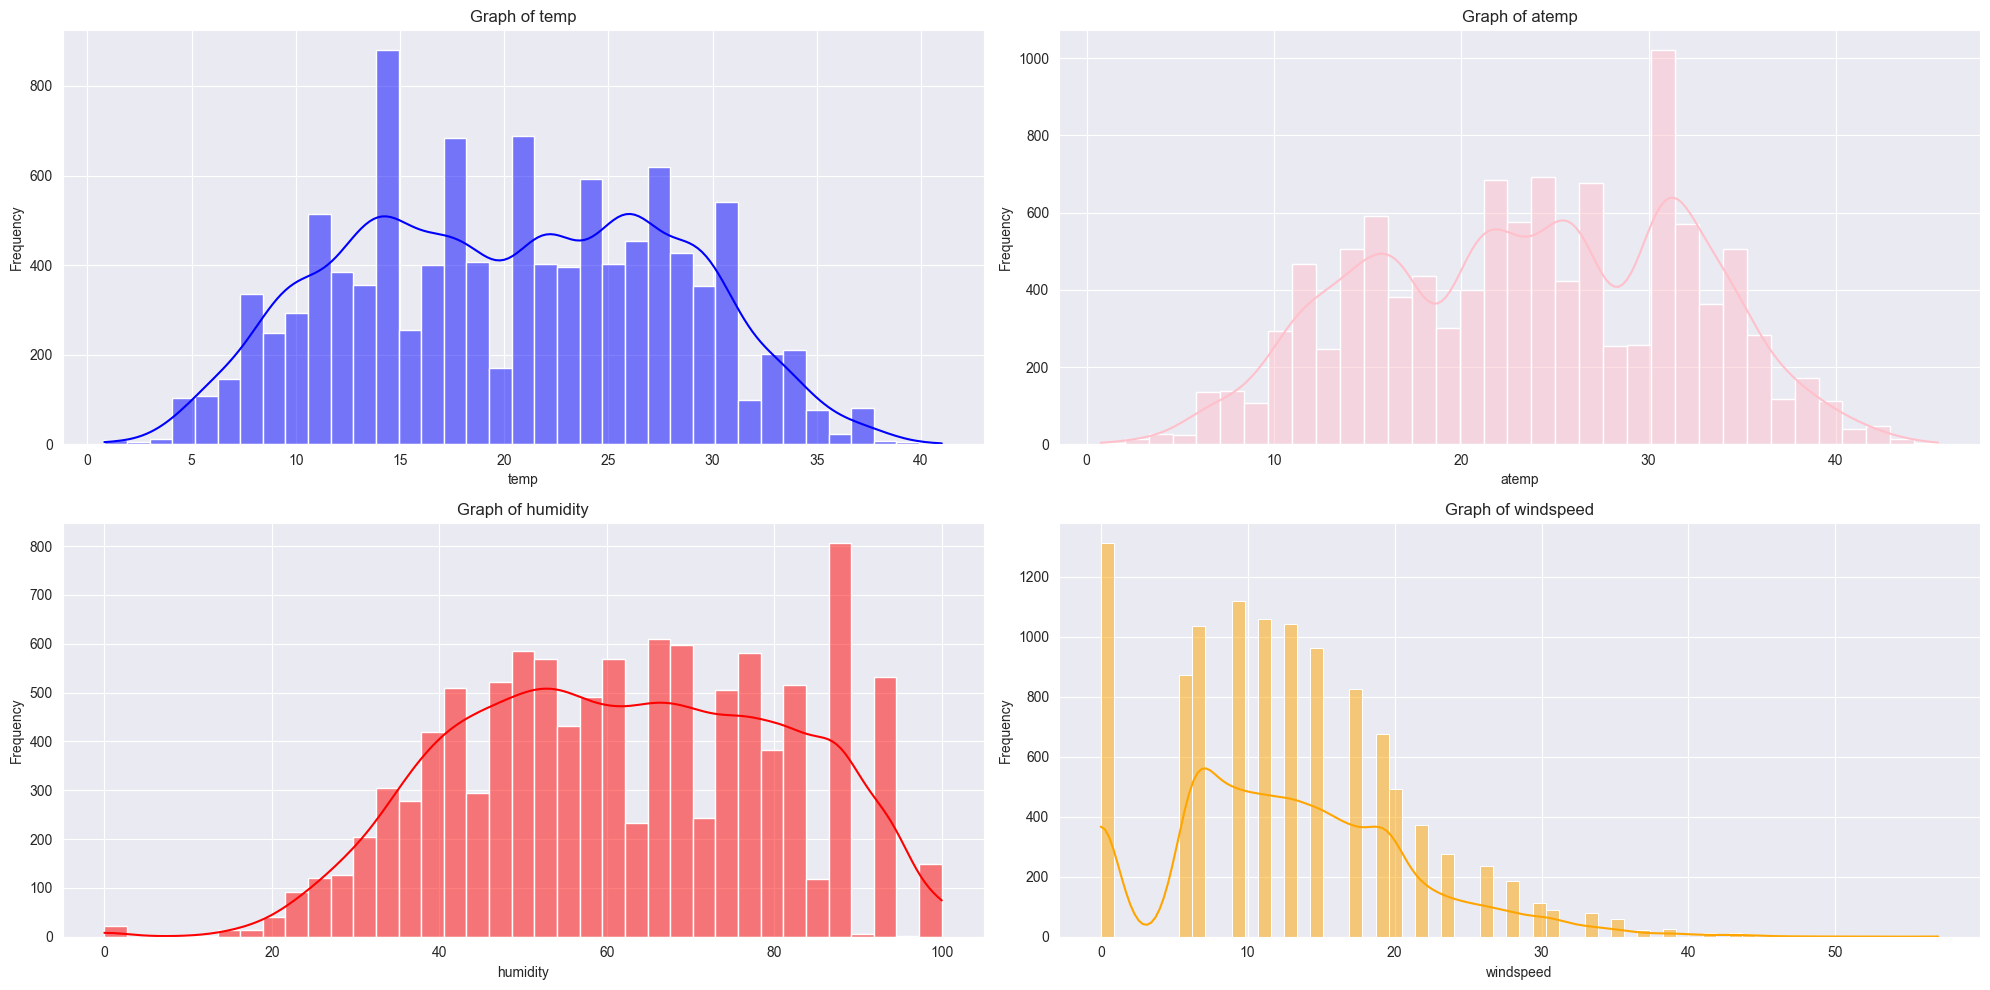

In [69]:
sns.set_style('darkgrid')
color_palette = ['blue', 'pink', 'red', 'orange']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Continuous columns excluding registered and count
continuous_columns_excluding_count = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(continuous_columns_excluding_count):
    sns.histplot(data=df, x=col, ax=axs.flatten()[i], kde=True, color=color_palette[i])
    axs.flatten()[i].set_ylabel('Frequency')
    axs.flatten()[i].set_title('Graph of ' + col)

plt.tight_layout()
plt.show()

Analysis of Continuous Variables:

1. **Temperature** (`temp`):

   - The temperature distribution appears to follow a single peak, resembling a normal distribution but slightly skewed to the right.
   - The majority of temperatures fall within the range of 15°C to 30°C.

2. **Perceived Temperature** (`atemp`):

   - The distribution of perceived temperature also shows a single peak and resembles the distribution of actual temperature.
   - Perceived temperature spans from approximately 5°C to 35°C.
   - Majority of the perceived temperature lies between 20°C to 35°C.

3. **Humidity** (`humidity`):

   - Humidity distribution appears to exhibit two peaks, indicating a bimodal distribution.
   - Humidity values are spread across a wide range, suggesting considerable variability in humidity levels.

4. **Wind Speed** (`windspeed`):

   - The wind speed distribution is strongly skewed to the right, suggesting the presence of outliers or extreme values.
   - Most wind speed values are concentrated around 15 units or lower, with some instances of higher wind speeds.

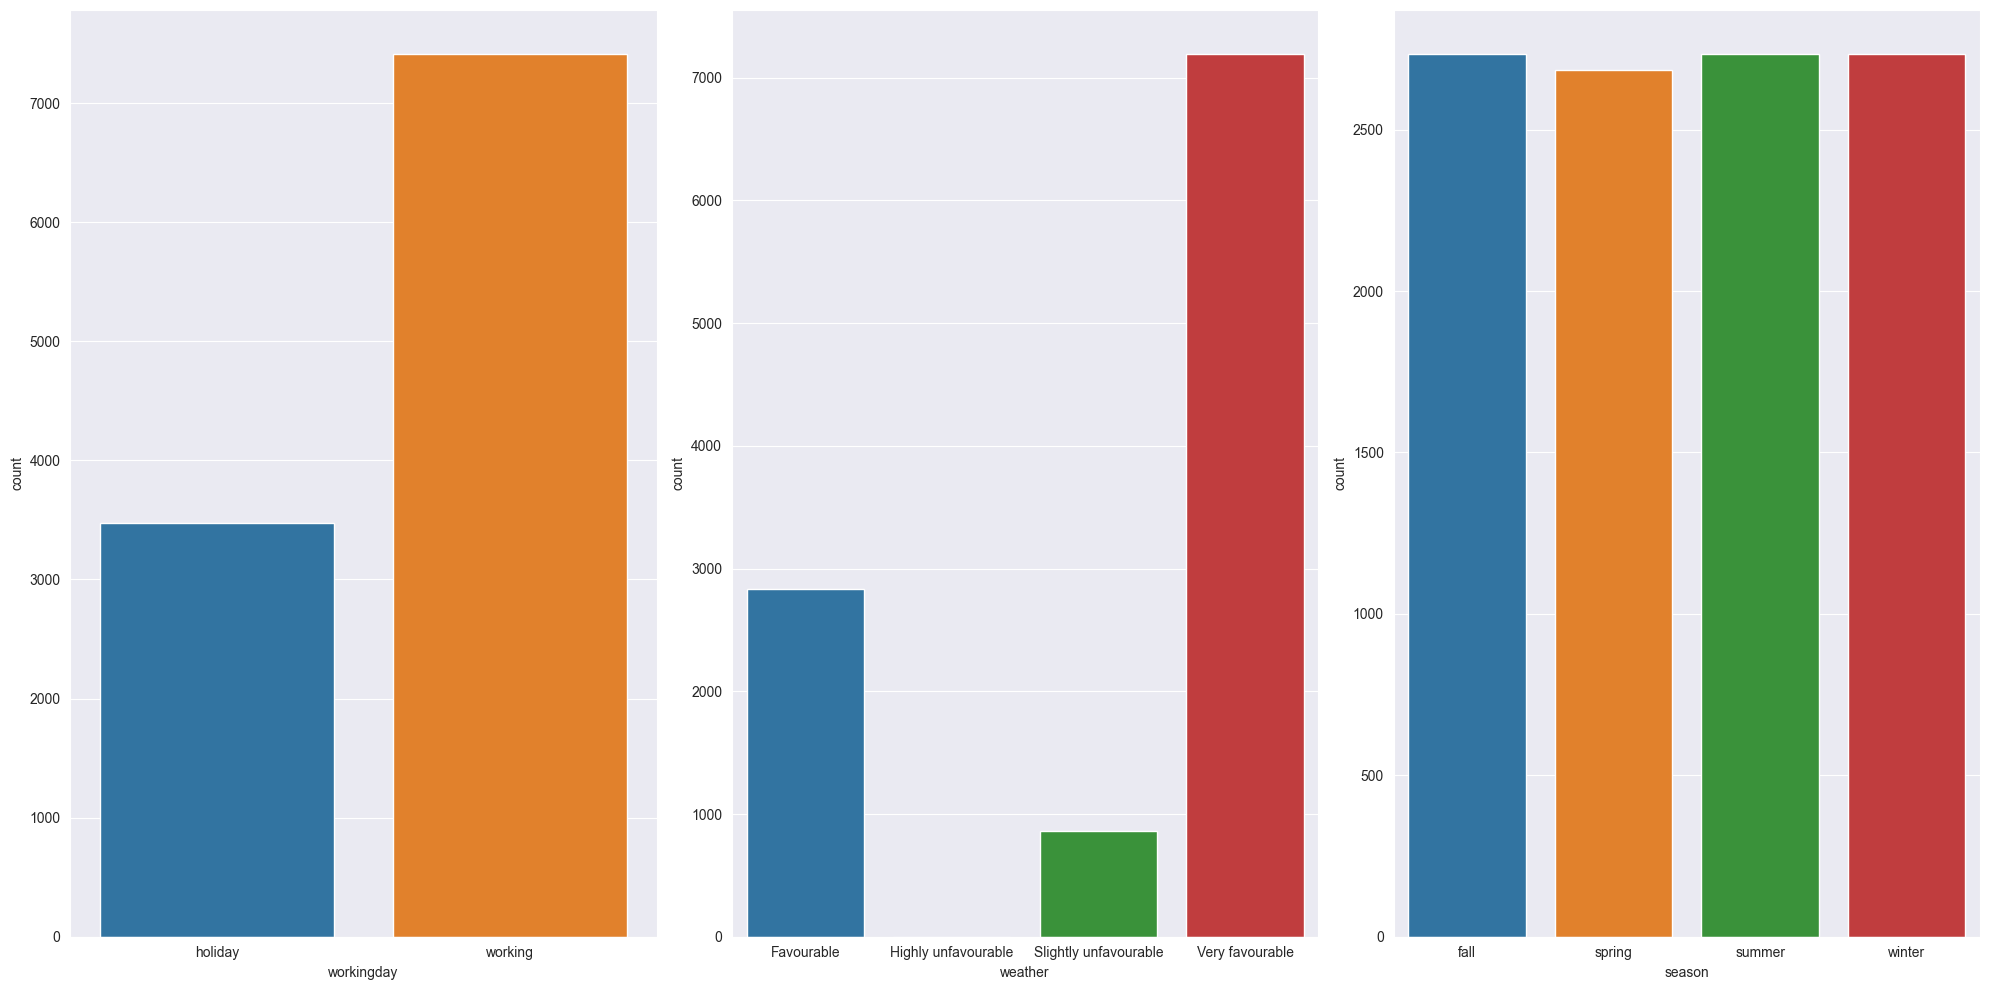

In [113]:
# Creating subplots

fig, axs = plt.subplots(1,3, figsize=(20,10))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col, ax=axs[i])

plt.tight_layout()
plt.show()

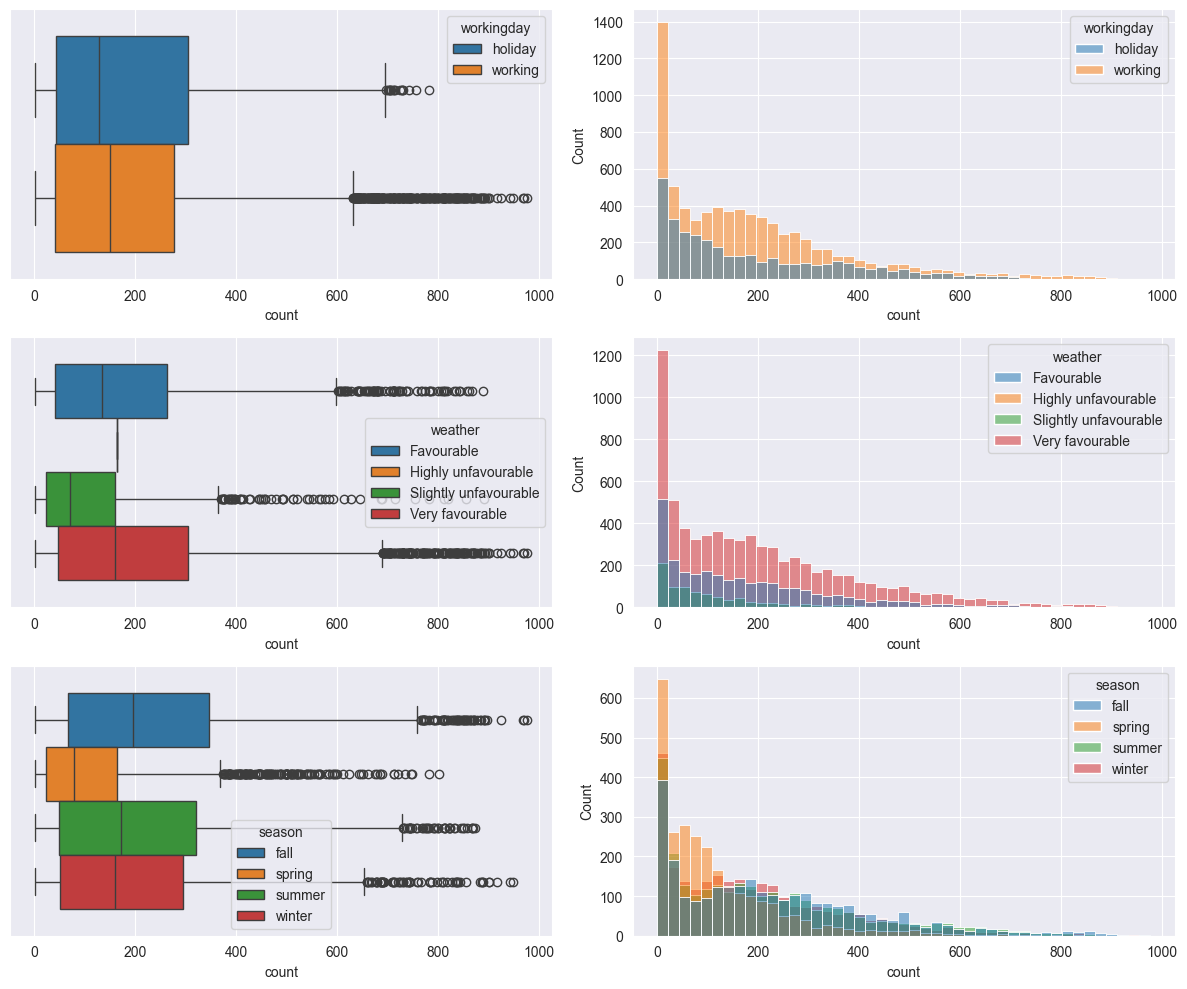

In [117]:
num_rows = 3
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x="count", hue=col, ax=axs[i][0])
    sns.histplot(data=df, x="count", hue=col, ax=axs[i][1])

plt.tight_layout()
plt.show()

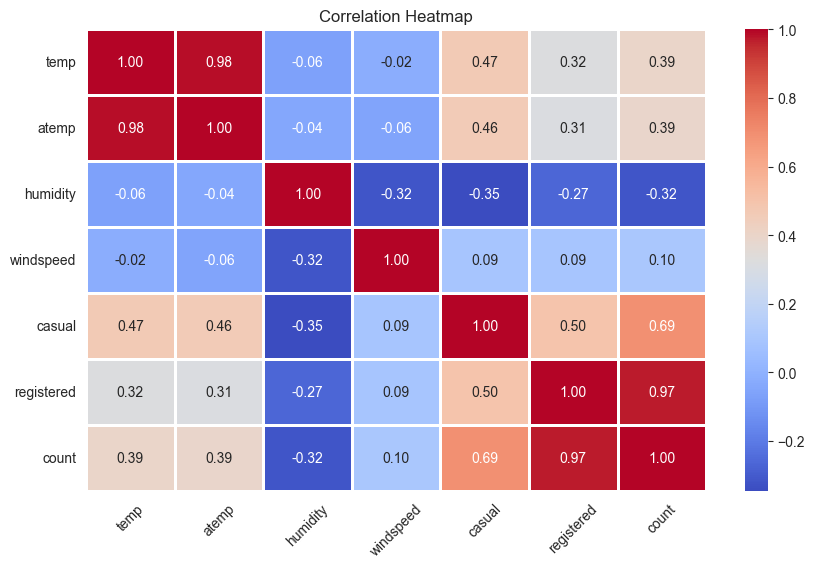

In [131]:
df_continuous = df.select_dtypes(['int','float'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_continuous.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- It can be observed that the atemp (perceived temperature) and casual columns are correlated with each other.
- It can be observed that the temp (temperature) and casual columns are also correlated with each other.

## Hypothesis Testing

### Problem Statement 1 :  If Working Day has an effect on the number of electric cycles rented

#### Visual Analysis

<Axes: xlabel='count', ylabel='Density'>

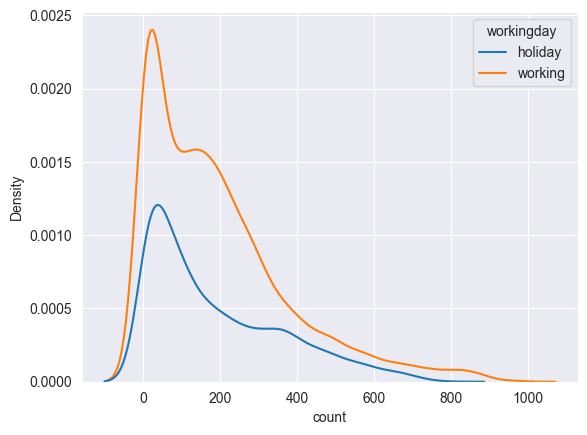

In [152]:
sns.kdeplot(data=df, x='count', hue='workingday')

####

**Null Hypothesis (H0):** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis (H1):** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

#### Assumptions:
1. 30 random samples will be taken randomly from the population data.
2. The data is independent.
3. We are testing means, and our sample size is 30. Hence, by CLT, we can state that the sample means of the data is normally distributed.
4. The samples have nearly equal variance.

#### T-Test

In [146]:
# random sampling (randomly selecting 30 samples from the data)
s1 = np.random.choice(df[df['workingday'] == 'working']['count'].values, 30)
s2 = np.random.choice(df[df['workingday'] == 'holiday']['count'].values, 30)

In [147]:
# t-test for independence
t_stat, pval = ttest_ind(s1, s2, alternative="two-sided")
print("T-statistic:", t_stat)
print("P-value:", pval)

T-statistic: -0.12605327038255384
P-value: 0.9001257055874855


In [148]:
alpha = 0.05
if pval >= alpha:
    print("Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.")
else:
    print("Reject null hypothesis. Working Day has an effect on the number of electric cycles rented.")

Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.


##### Inference :

The t-test that we performed, strongly suggests that whether it is a woking day (or not), has `NO effect` on the number of electric cycles rented.

### Problem Statement 2 : If weather has signifance on no. of cycles being rented

#### Visual Analysis

C:\Users\techi\AppData\Local\Temp\ipykernel_14816\424316121.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='count', hue='weather')


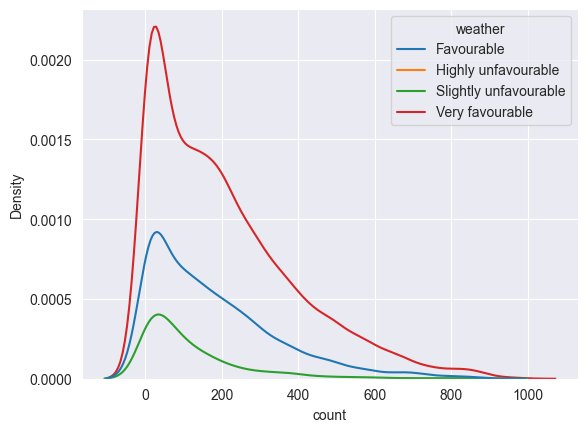

In [156]:
sns.kdeplot(data=df, x='count', hue='weather')
plt.show()

#####

<hr/>

The KDE plot suggests that the weather does not follow a normal distribution. Rather, it follows an F-distribution.

<hr/>
<br/>

**Null Hypothesis (H0):** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis (H1):** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

#### Assumptions:

- The data is independent.
- We can test the data using QQ-Plots or Shapiro-Wilk Test for normality. (significance level = 0.05)
- Data has equal variances

#### Normal Distribution Test

In [175]:
weather_very_favourable = df[df['weather'] == 'Very favourable']['count'].values
weather_favourable = df[df['weather'] == 'Favourable']['count'].values
weather_slightly_unfavourable = df[df['weather'] == 'Slightly unfavourable']['count'].values
weather_highly_unfavourable = df[df['weather'] == 'Highly unfavourable']['count'].values

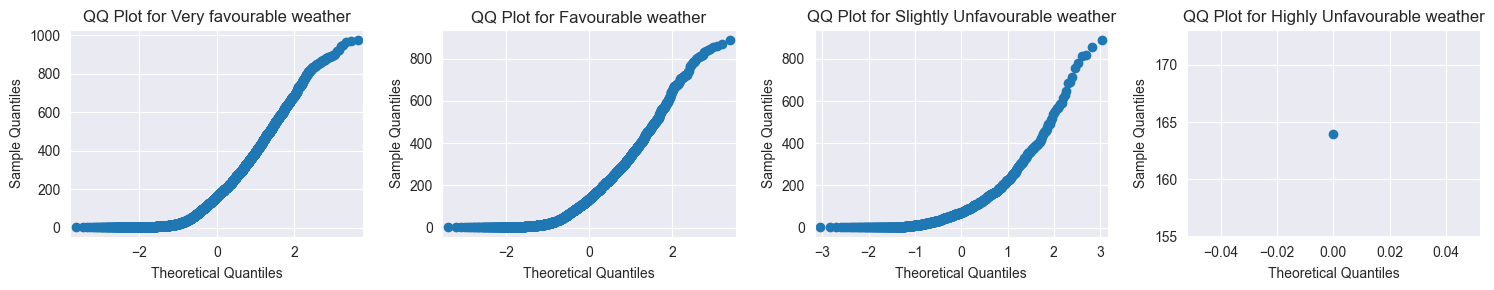

In [176]:
# qq-plot for independence
fig, axs = plt.subplots(1, 4, figsize=(15, 3))

weathers = [weather_very_favourable,weather_favourable,weather_slightly_unfavourable,weather_highly_unfavourable]
weather_condition = ['Very favourable','Favourable','Slightly Unfavourable','Highly Unfavourable']

for i, data in enumerate(weathers):
    qqplot(data, ax=axs[i])
    axs[i].set_title(f"QQ Plot for {weather_condition[i]} weather")

plt.tight_layout()
plt.show()

These QQ-plots indicate that the data is not normally distributed for weather conditions.

In [181]:
#Since the last weather has only 1 datapoint, and Shapiro-Wilk requires atleast 3 datapoints, let us skip the last weather type

weather_data = {
    "Weather 1": weather_very_favourable,
    "Weather 2": weather_favourable,
    "Weather 3": weather_slightly_unfavourable
}

for weather, data in weather_data.items():
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {weather}:")
    print("Test Statistic:", stat)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print('\n')


Shapiro-Wilk Test for Weather 1:
Test Statistic: 0.8909259459740138
p-value: 1.5964921477006552e-57
Data is not normally distributed


Shapiro-Wilk Test for Weather 2:
Test Statistic: 0.8767694973495206
p-value: 9.777839106111785e-43
Data is not normally distributed


Shapiro-Wilk Test for Weather 3:
Test Statistic: 0.7674327906035717
p-value: 3.875893017396149e-33
Data is not normally distributed




C:\Users\techi\AppData\Local\Temp\ipykernel_14816\2731755075.py:9: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  stat, p_value = shapiro(data)


This test thus, confirms that the given data is not normally distributed.

#### ANOVA

In [187]:
weather_list = [weather_very_favourable,weather_favourable,weather_slightly_unfavourable,weather_highly_unfavourable]

f_stat, p_value = f_oneway(*weather_list)

print("ANOVA Results:")
print("F-Statistic:", f_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("The number of cycles rented is different in different weathers.")
else:
    print("\nFail to reject null hypothesis.")
    print("The number of cycles rented is similar in different weathers.")

ANOVA Results:
F-Statistic: 65.53024112793271
P-value: 5.482069475935669e-42

Reject the null hypothesis.
The number of cycles rented is different in different weathers.


#### Kruskal - Wallis Test

In [ ]:
# We are performing the kruskal-wallis test for cross-checking our hypothesis, because it is considered better than ANOVA, when assumptions are not met

kruskal_stat, p_value = kruskal(*weather_list)

print("Kruskal-Wallis Results:")
print("Kruskal-Statistic:", kruskal_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("The number of cycles rented is different in different weathers according to Kruskal-Wallis.")
else:
    print("\nFail to reject null hypothesis.")
    print("The number of cycles rented is similar in different weathers according to Kruskal-Wallis.")

Kruskal-Wallis Results:
Kruskal-Statistic: 205.00216514479087
P-value: 3.501611300708679e-44

Reject the null hypothesis.
The number of cycles rented is different in different weathers according to Kruskal-Wallis.


###  Problem Statement 3 : Season has a affect on number of cycles being rented

#### Visual Analysis

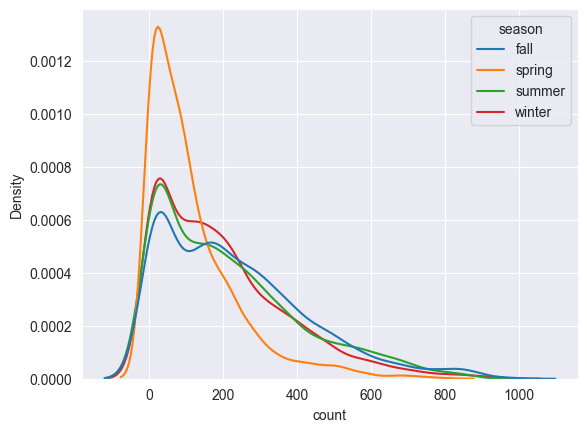

In [193]:
sns.kdeplot(data = df, x="count", hue="season")
plt.show()

##### It seems from the KDE plot that the data is not normally distributed

####

**Null Hypothesis (H0)** - No. of cycles rented is similar in different seasons.

**Alternate Hypothesis (H1)** - No. of cycles rented is different in different 

#### Assumptions :

- The data is independent of each other.
- Let us test the normality of data using QQ-Plots or Shapiro-Wilk Test. (significance level = 0.05)
- The data is equi-variant

#### Test for Normality

In [195]:
season_spring = df[df['season'] == 'spring']['count'].values
season_summer = df[df['season'] == 'summer']['count'].values
season_fall = df[df['season'] == 'fall']['count'].values
season_winter = df[df['season'] == 'winter']['count'].values

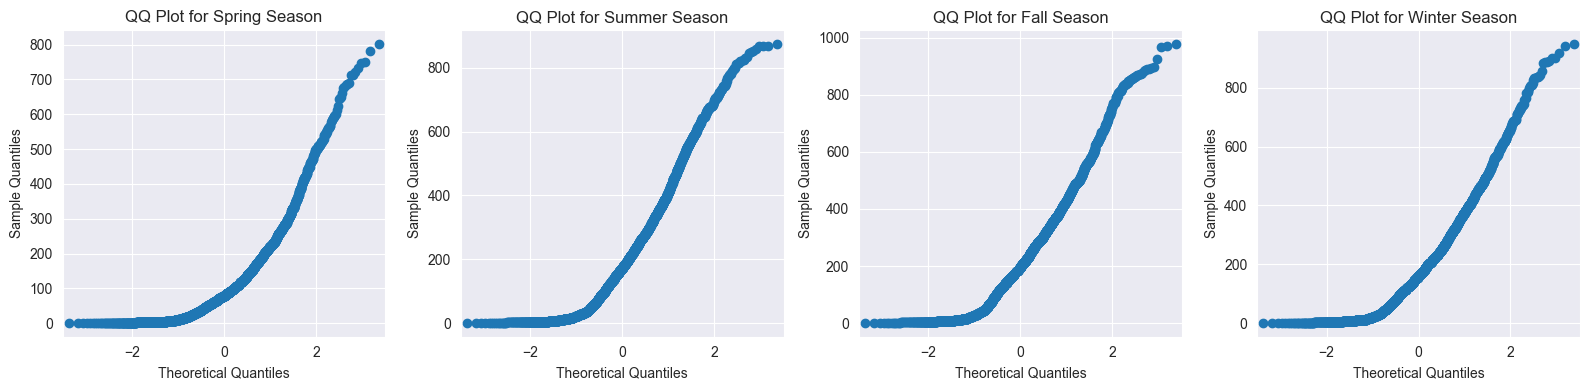

In [200]:
seasons = [season_spring, season_summer, season_fall, season_winter]
season_list = ["Spring", "Summer", "Fall", "Winter"]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i, data in enumerate(seasons):
    qqplot(data, ax=axs[i])
    axs[i].set_title(f"QQ Plot for {season_list[i]} Season")

plt.tight_layout()
plt.show()

These QQ-Plots suggest that the given data is not normally distributed.

##### Shapiro - Wilk Test

In [202]:
for season, data in zip(season_list, seasons):
    stats, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {season}:")
    print("Test Statistic:", stats)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()

Shapiro-Wilk Test for Spring:
Test Statistic: 0.8087378401253588
p-value: 8.749584618867662e-49
Data is not normally distributed

Shapiro-Wilk Test for Summer:
Test Statistic: 0.9004818080893252
p-value: 6.039374406270491e-39
Data is not normally distributed

Shapiro-Wilk Test for Fall:
Test Statistic: 0.9148166372899196
p-value: 1.043680518918597e-36
Data is not normally distributed

Shapiro-Wilk Test for Winter:
Test Statistic: 0.8954637482095505
p-value: 1.1299244409282836e-39
Data is not normally distributed



The Shapiro-Wilk Test thus, confirms that the given data is not normally distributed.

#### ANOVA

In [203]:
f_stat, p_value = f_oneway(*seasons)

print("F-Statistic:", f_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different seasons.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different seasons.")

F-Statistic: 236.94671081032106
P-value: 6.164843386499654e-149

Reject the null hypothesis.
Number of cycles rented is different in different seasons.


#### Kruskal - Wallis Test

In [204]:
kruskal_stat, p_value = kruskal(*seasons)

print("Kruskal-Statistic:", kruskal_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("\nReject the null hypothesis.")
    print("Number of cycles rented is different in different seasons.")
else:
    print("\nFail to reject null hypothesis.")
    print("Number of cycles rented is similar in different seasons.")

Kruskal-Statistic: 699.6668548181988
P-value: 2.479008372608633e-151

Reject the null hypothesis.
Number of cycles rented is different in different seasons.


## Final Conclusion

- The `visual analysis` of `continuous variables` suggests that `count` is more closely related to `temperature` and `perceived temperature` than any other attribute.
- The `hypothesis testing` and `visual analysis` of `categorical variables` suggests that :
    - The `working day`/`holiday` has `no effect` on the number of cycles being rented.
    - The `weather` has `no effect` on the number of cycles being rented.
    - The `season` has `no effect` on the number of cycles being rented.